In [9]:
import os
import sys
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import joblib

In [10]:
print("Python executable:", sys.executable)
print("Current working directory:", os.getcwd())

Python executable: C:\Users\HP\anaconda3\python.exe
Current working directory: C:\Users\HP\Desktop\promohub-ml\notebooks


In [12]:
sms_files = []
for root, dirs, files in os.walk("../data/raw"):
    for f in files:
        if "spam" in f.lower() or "sms" in f.lower():
            sms_files.append(os.path.join(root, f))

sms_files

['../data/raw\\sms dataset\\SMSSpamCollection']

In [13]:
data_path = "../data/raw\\sms dataset\\SMSSpamCollection"

df = pd.read_csv(
    data_path, 
    sep="\t", 
    header=None, 
    names=["label", "message"]
)
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.info()
df["label"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


label
ham     4825
spam     747
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

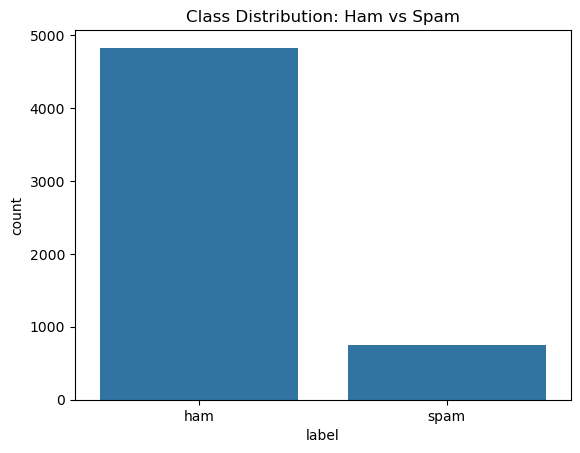

In [16]:
sns.countplot(x="label", data=df)
plt.title("Class Distribution: Ham vs Spam")
plt.show

In [17]:
df["message_length"] = df["message"].apply(len)

df.groupby("label")["message_length"].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
ham,4825.0,71.482902,58.442635,2.0,33.0,52.0,93.0,910.0
spam,747.0,138.670683,28.873603,13.0,133.0,149.0,157.0,223.0


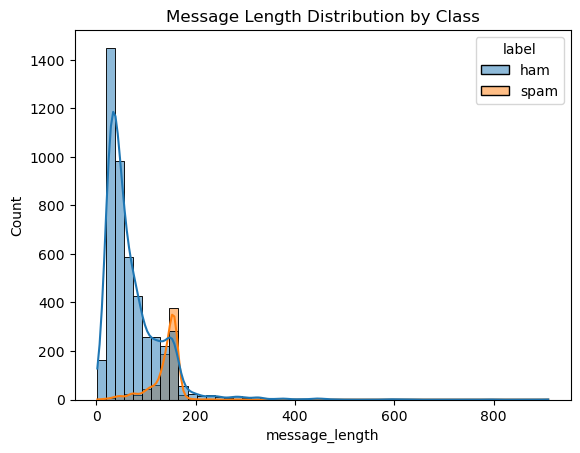

In [18]:
sns.histplot(
    data=df,
    x="message_length",
    hue="label",
    bins=50,
    kde=True
)
plt.title("Message Length Distribution by Class")
plt.show()

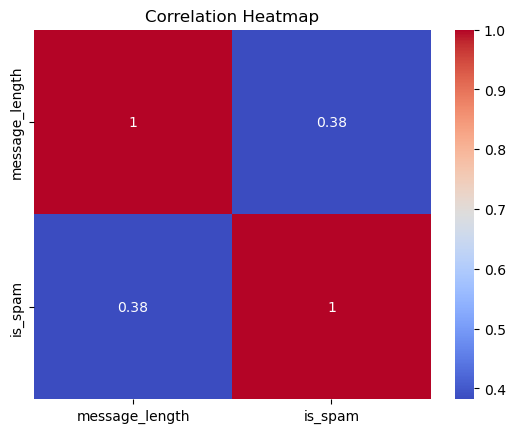

In [19]:
df["is_spam"] = df["label"].map({"ham": 0, "spam": 1})

corr_df = df[["message_length", "is_spam"]].corr()

sns.heatmap(corr_df, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()